In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Customers.csv')

In [3]:
df.head()

,age,income,gender,m_status,buys
0,25.0,high,male,single,no
1,25.0,high,male,married,no
2,35.0,high,male,single,yes
3,35.0,medium,male,single,yes
4,30.0,low,female,single,yes


In [4]:
df.isnull().sum()

age         2
income      0
gender      0
m_status    1
buys        0
dtype: int64

In [5]:
fill_mean = df.age.mean()

In [6]:
#fill_median = df.age.median()

In [7]:
fill_mean

28.65

In [8]:
#fill_median

In [9]:
df.age = df.age.fillna(fill_mean)

In [10]:
df.isnull().sum()

age         0
income      0
gender      0
m_status    1
buys        0
dtype: int64

In [11]:
fill = df.m_status.mode()

In [12]:
fill

0    single
dtype: object

In [13]:
fill = 'single'

In [14]:
df.m_status = df.m_status.fillna(fill)

<AxesSubplot:xlabel='m_status', ylabel='Count'>

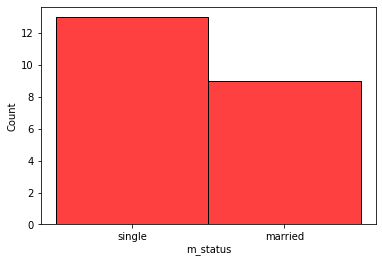

In [15]:
import seaborn as sns
sns.histplot(df.m_status, color = 'red')

In [16]:
df.isnull().sum()

age         0
income      0
gender      0
m_status    0
buys        0
dtype: int64

# Ordinal Encoder

In [17]:
df = pd.read_csv('Customers.csv')

In [18]:
df.head()

,age,income,gender,m_status,buys
0,25.0,high,male,single,no
1,25.0,high,male,married,no
2,35.0,high,male,single,yes
3,35.0,medium,male,single,yes
4,30.0,low,female,single,yes


In [19]:
df.income.unique()

array(['high', 'medium', 'low'], dtype=object)

In [20]:
order = ['high', 'medium', 'low']

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
odr = OrdinalEncoder(categories = [order])

In [23]:
encoded = odr.fit_transform(df[['income']])

In [24]:
new_income = pd.DataFrame(encoded, columns = ['income'])

In [25]:
new_income.head()

,income
0,0.0
1,0.0
2,0.0
3,1.0
4,2.0


In [26]:
df.head()

,age,income,gender,m_status,buys
0,25.0,high,male,single,no
1,25.0,high,male,married,no
2,35.0,high,male,single,yes
3,35.0,medium,male,single,yes
4,30.0,low,female,single,yes


In [27]:
df.income = new_income

In [28]:
df.head()

,age,income,gender,m_status,buys
0,25.0,0.0,male,single,no
1,25.0,0.0,male,married,no
2,35.0,0.0,male,single,yes
3,35.0,1.0,male,single,yes
4,30.0,2.0,female,single,yes


# Label Encoder

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
df.gender = le.fit_transform(df['gender'])

In [32]:
df.gender.head()

0    1
1    1
2    1
3    1
4    0
Name: gender, dtype: int32

In [33]:
df.head()

,age,income,gender,m_status,buys
0,25.0,0.0,1,single,no
1,25.0,0.0,1,married,no
2,35.0,0.0,1,single,yes
3,35.0,1.0,1,single,yes
4,30.0,2.0,0,single,yes


# One Hot Encoder

In [34]:
dummy = pd.get_dummies(df['m_status'])

In [35]:
dummy.head()

,married,single
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [36]:
df = df.drop(['m_status'], axis = 1)

In [37]:
df.head()

,age,income,gender,buys
0,25.0,0.0,1,no
1,25.0,0.0,1,no
2,35.0,0.0,1,yes
3,35.0,1.0,1,yes
4,30.0,2.0,0,yes


In [38]:
df = pd.concat([df, dummy], axis = 1)

In [39]:
df.head()

,age,income,gender,buys,married,single
0,25.0,0.0,1,no,0,1
1,25.0,0.0,1,no,1,0
2,35.0,0.0,1,yes,0,1
3,35.0,1.0,1,yes,0,1
4,30.0,2.0,0,yes,0,1


# Hashing/Category Encoder

In [40]:
#import category_encoders as ce

In [41]:
#encoder = ce.HashingEncoder(cols = 'buys', n_components=2)

In [42]:
#encoder.fit_transform(df).head()

# Without Encoding

In [43]:
df.buys = df.buys.replace(['yes', 'no'], [0, 1])

In [44]:
df.buys.head()

0    1
1    1
2    0
3    0
4    0
Name: buys, dtype: int64

In [45]:
df.head()

,age,income,gender,buys,married,single
0,25.0,0.0,1,1,0,1
1,25.0,0.0,1,1,1,0
2,35.0,0.0,1,0,0,1
3,35.0,1.0,1,0,0,1
4,30.0,2.0,0,0,0,1
